In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customer_data = pd.read_csv('/content/drive/My Drive/data_shop.csv', encoding='latin1')
customer_data.head()

,IDKhachHang,GioiTinh,Tuoi,ThuNuapHangNam,DiemChiTieu
0,1,Nam,19,15,39
1,2,Nu,21,15,81
2,3,Nu,20,16,6
3,4,Nu,23,16,77
4,5,Nu,31,17,40


In [ ]:
#### chiều dữ liệu
print(customer_data.shape)

(200, 5)


In [ ]:
X = customer_data.iloc[:, 2:4].values
print(X.shape)

(200, 2)


Text(0.5, 1.0, 'Biểu đồ phân phối dữ liệu')

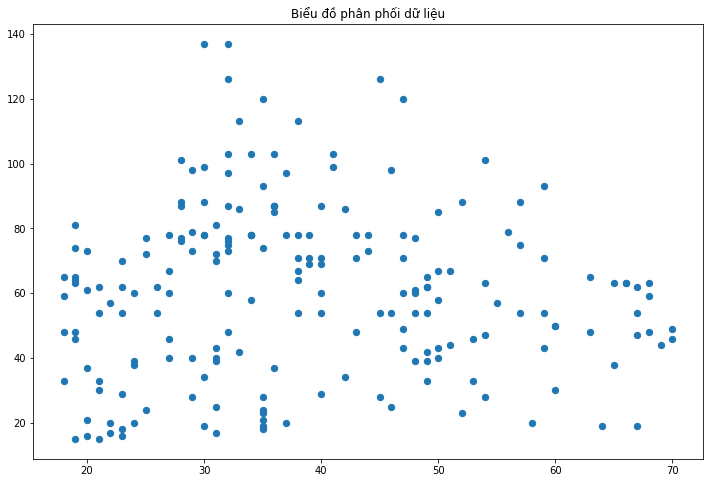

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], lw=1, s=40)
plt.title('Biểu đồ phân phối dữ liệu')

In [ ]:
data = customer_data.drop(columns= ["IDKhachHang","GioiTinh"], axis=1)

In [ ]:
data.head()

,Tuoi,ThuNuapHangNam,DiemChiTieu
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
data.shape

(200, 3)

In [ ]:
##### Chuẩn hóa dữ liệu
from sklearn.preprocessing import normalize
data = pd.DataFrame( normalize(data) , columns=data.columns)
data.head()

,Tuoi,ThuNuapHangNam,DiemChiTieu
0,0.413925,0.326783,0.849635
1,0.247025,0.176446,0.952809
2,0.760286,0.608229,0.228086
3,0.280697,0.195267,0.939723
4,0.580683,0.318439,0.749269


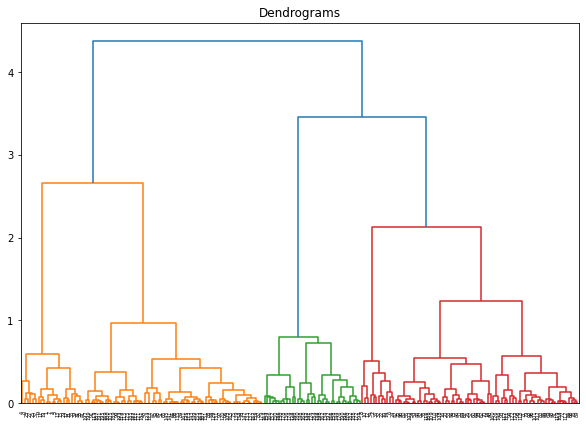

In [ ]:
### Trực quan hóa dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

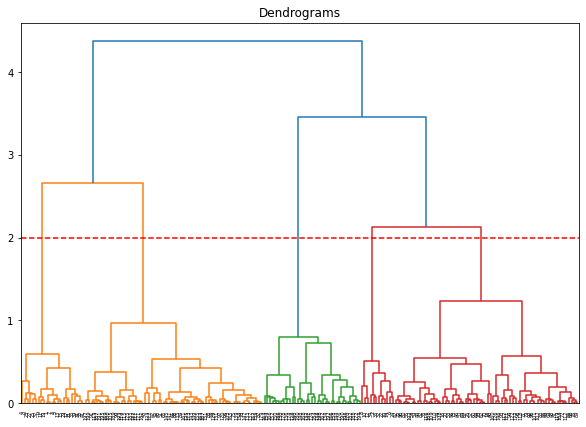

In [ ]:
#Cắt biểu đồ
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

In [ ]:
#Xây dựng mô hình phân cụm phân cấp hợp nhất
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering(
  n_clusters=2,  #Trong đó n_clusters là số lượng cụm cần phân chia
  affinity='euclidean', #là phương pháp tính khoảng cách giữa các quan sát
  compute_full_tree='auto', 
  linkage='ward', #phương pháp áp dụng để tính khoảng cách giữa các cụm
  distance_threshold=None, 
  compute_distances=False)

AgglomerativeClustering()

In [ ]:
#Tạo cụm với phân cụm kết tụ
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
X_std = std.fit_transform(X)
#sử dụng khoảng các cụm là ward linkage và phương pháp tính khoảng cách giữa các điểm là euclidean.
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X_std)

In [ ]:
cluster.fit_predict(data)

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 4, 3, 0, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

<ipython-input-90-dc3c0795f9a1>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])


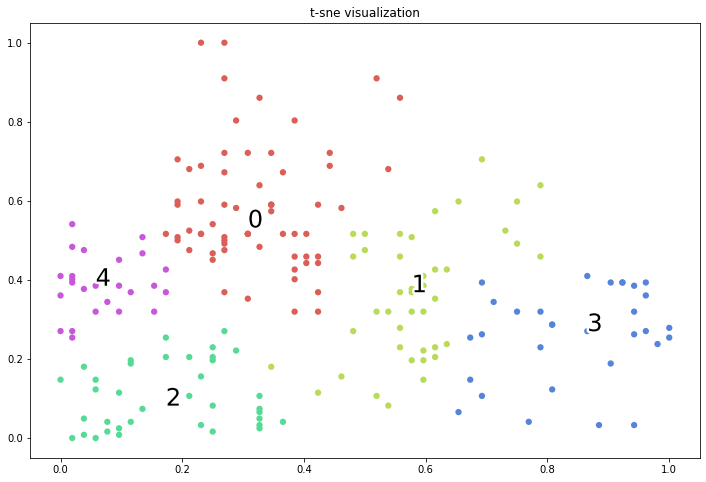

In [ ]:
import seaborn as sns
import matplotlib.patheffects as PathEffects
def hierarchical_clustering(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    txts = []
    
    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

hierarchical_clustering(X_std, labels)